In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
print(type(mnist))

print('train:', mnist.train.num_examples)
print('test:', mnist.test.num_examples)
print('validation:', mnist.validation.num_examples)

print('Shape of training images:', mnist.train.images.shape)
print('Shape of training labels:', mnist.train.labels.shape)


<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
data
train: 55000
test: 10000
validation: 5000
Shape of training images: (55000, 784)
Shape of training labels: (55000, 10)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


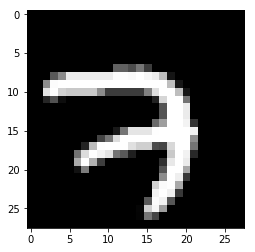

In [7]:
import numpy as np
import matplotlib.pyplot as plt

img = mnist.train.images[0]
img = np.reshape(img, (28, 28))

print(mnist.train.labels[0])
plt.imshow(img, cmap=plt.cm.gray) 
plt.show()
